In [5]:
import numpy as np
import qiskit
import qiskit.quantum_info as qi
import sys
sys.path.insert(0, '..')
from qoop.core import state, metric, ansatz
from qoop.compilation.qsp import QuantumStatePreparation
from qoop.evolution.environment import EEnvironmentMetadata
from qoop.evolution.environment import EEnvironment
%load_ext autoreload
%autoreload 2

In [71]:
def fitnessW(qc: qiskit.QuantumCircuit):
    global qcx
    qcx = qc
    compiler = QuantumStatePreparation(
        u = qc,
        target_state = state.w(2).inverse()
    ).fit()
    return 1 - compiler.compiler.metrics['loss_fubini_study'][-1] # Fitness value

env_metadata = EEnvironmentMetadata(
        num_qubits = 2, # As its name
        depth = 2, # Ansatz depth you want
        num_circuit = 8, # Number of ansatz per generation
        num_generation = 10, # Number of generation/iteration for GA 
        prob_mutate = 0.01 # Mutation probability, usually as small as 0.01 (1%)
)

env = EEnvironment(
    metadata = env_metadata,
    fitness_func = fitnessW,
)

env.evol()

Initialize list of circuit ...
Start evol progress ...
Running at generation 1
[0.29289321881025165, 0.999981350897614, 0.2928932188134524, 0.0, 0.29289321881025165, 0.1339745962155613, 0.2928932188134524, 0.1339745962155613]
Saving circuit ...
End progress soon at generation 1, best score ever: 0.999981350897614


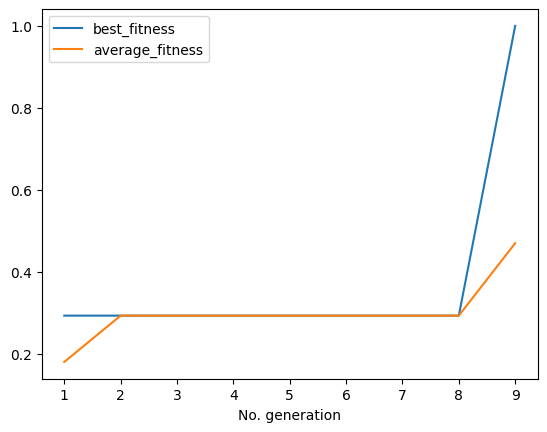

In [69]:
env.plot()